In [103]:
import cv2
import google.colab.patches as colab
import numpy as np
import matplotlib.pyplot as plt

從路徑找尋找片，並呈現出來。

Image:


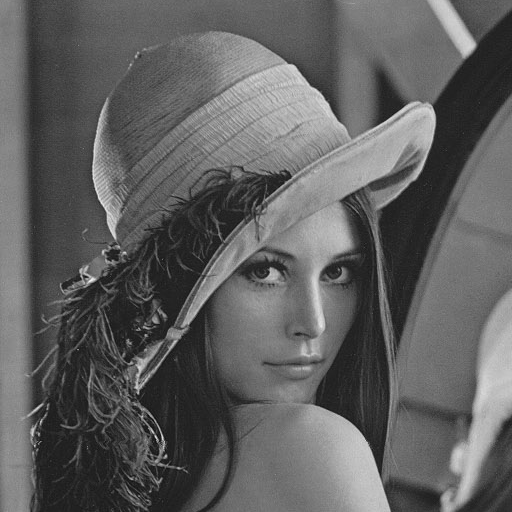

In [104]:
in_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/lena.bmp",0) #結尾給0，為了讓圖片輸出灰色
print('Image:')
colab.cv2_imshow(in_image) #show image

計算圖片中直方圖的數據

In [105]:
#讀取照片的row和col
rows = in_image.shape[0] # shape[0]表示高度
cols = in_image.shape[1] # shape[1]表示寬度

histogram = np.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):
    value = in_image[r,c] # value 當作讀取數值的變數
    histogram[value] = histogram[value] + 1

for x in range(256):
   histogram[x] = histogram[x]/(rows * cols)

展示直方圖

<BarContainer object of 256 artists>

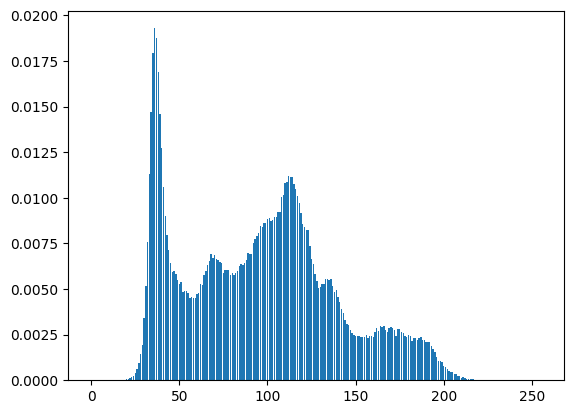

In [106]:
plt.bar(range(histogram.shape[0]), histogram)

套入公式計算  T = （Ｌ- 1 ）* ΣＰin (rj)



In [107]:
#宣告Ｔ並準備計算
T = np.zeros((256), dtype=int)

#輸入P_in設為0
P_in = 0.0

#
for x in range(256):
  P_in = P_in + histogram[x]
  T[x] = int(255.0 * P_in)


In [108]:
# create an output image
result_image = np.zeros(in_image.shape, dtype=np.uint8)

for r in range(rows):
  for c in range(cols):
    value = in_image[r,c]
    out_value = T[value]
    result_image[r,c] = out_value

展示照片

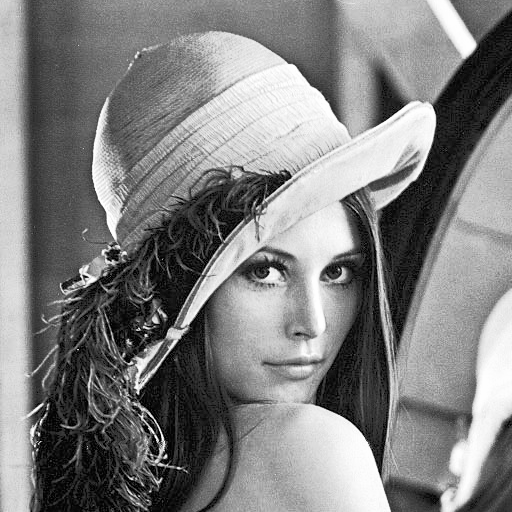

In [109]:
colab.cv2_imshow(result_image)

<BarContainer object of 256 artists>

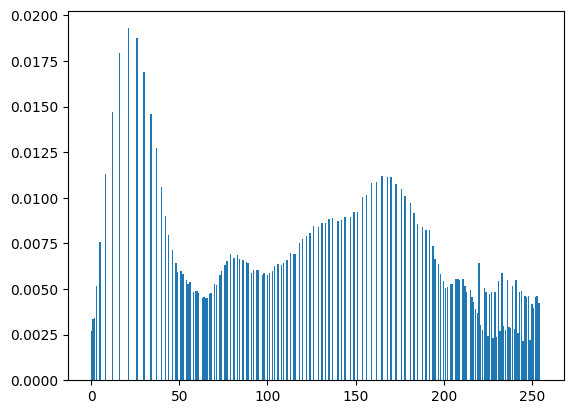

In [110]:
result_histogram = np.zeros((256), dtype=float)

for r in range(rows):
  for c in range(cols):
    value = result_image[r,c]
    result_histogram[value] = result_histogram[value] + 1

for i in range(256):
  result_histogram[i] = result_histogram[i] / (rows * cols)

plt.bar(range(result_histogram.shape[0]), result_histogram)